In [1]:
!pip3 install texthero
!pip3 install wordcloud
!pip3 install contractions

  Using cached contractions-0.1.73-py2.py3-none-any.whl (8.7 kB)
  Using cached textsearch-0.0.24-py2.py3-none-any.whl (7.6 kB)
  Using cached anyascii-0.3.2-py3-none-any.whl (289 kB)


In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import numpy as np
import texthero as hero 
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from collections import Counter
import contractions

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vladudri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
lemma = WordNetLemmatizer()

In [13]:
data = pd.read_csv('dataset.csv', encoding='ISO-8859-1')
data

,ID,AuthorID,Author,Date,Content,Words,"Change in appetite, losing or gaining weight",Sleeping too much or not sleeping well (insomnia),Fatigue and low energy most days,"Feeling worthless, guilty, and hopeless","An inability to focus and concentrate that may interfere with daily tasks at home, work, or school",Movements that are unusually slow or agitated (a change which is often noticeable to others),Thinking about death and dying; suicidal ideation or suicide attempts,None
0,1,4.560000e+17,Deleted User#0000,43630.77639,**List of International Suicide Hotlines**\n``...,72,N,N,N,N,N,N,N,Y
1,2,4.560000e+17,Deleted User#0000,43630.78611,"Hello, if you're depressed, being self-depreca...",56,N,N,N,Y,N,N,Y,N
2,3,4.680000e+17,angel?#5373,43630.84306,Please note that we are not professionals. Th...,61,N,N,N,N,N,N,N,Y
3,4,5.450000e+17,Sease#2410,43630.84514,yeah and people who just want attention don't ...,36,N,N,N,N,N,N,N,Y
4,5,3.030000e+17,Emma/Blue#2035,43630.85347,Just a small vent my arm hurts so much i know ...,41,N,N,N,Y,Y,Y,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23989,23995,3.110000e+17,AfonsoHackers#6969,44071.59167,> And it's just getting so annoying and I'm so...,26,N,N,N,N,N,N,N,Y
23990,23996,6.460000e+17,sluttywhoreï£¿Ã¼Â¶Â¶#3156,44071.59236,And I'm mixed so I get called the n word with ...,18,N,N,N,Y,N,N,N,N
23991,23997,7.240000e+17,SAD BHABHIE.#3636,44071.59236,> @SAD BHABHIE. oof that's a good thing I supp...,50,N,N,N,N,N,N,N,Y
23992,23998,7.240000e+17,SAD BHABHIE.#3636,44071.59236,> And I'm mixed so I get called the n word wit...,21,N,N,N,Y,N,N,N,N


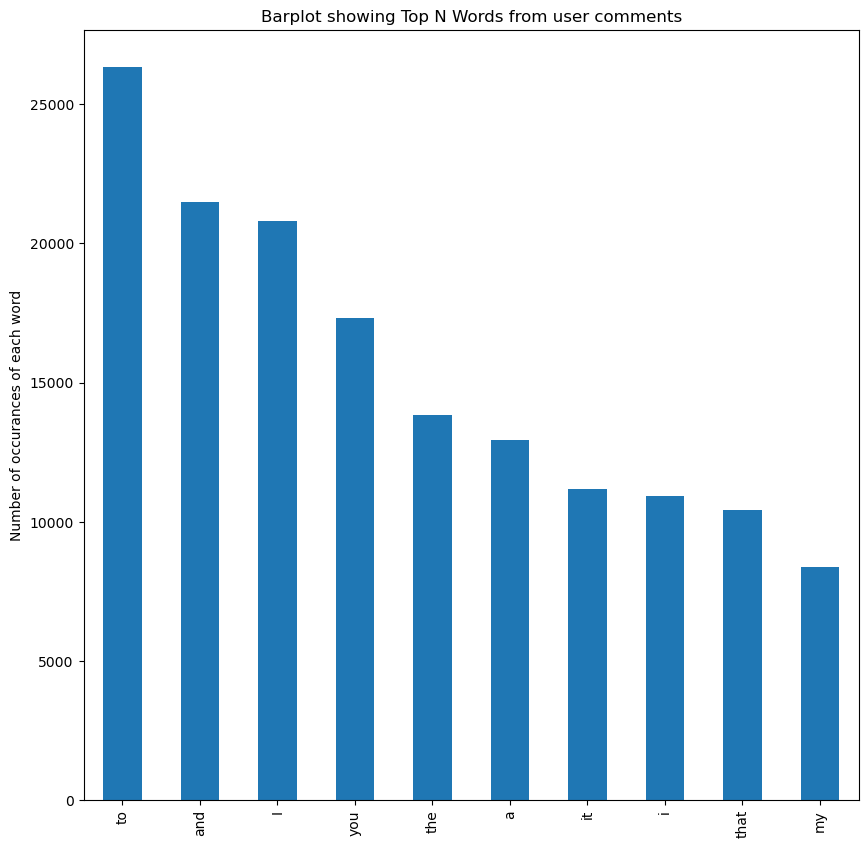

In [14]:
hero.top_words(data['Content']).head(10).plot.bar(figsize=(10,10))
plt.title('Barplot showing Top N Words from user comments')
plt.ylabel('Number of occurances of each word')
plt.show()

In [15]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(data['Content'])

In [16]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

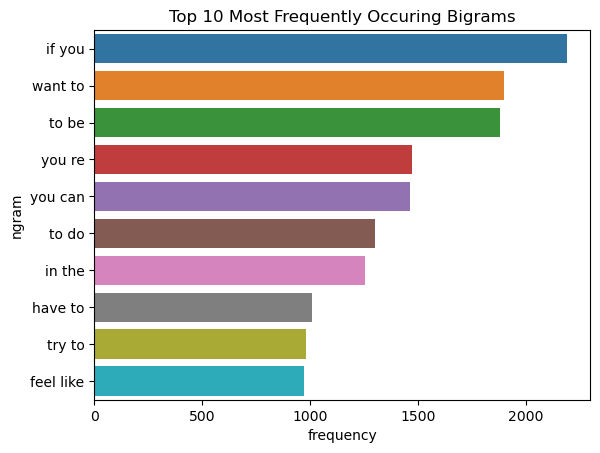

In [17]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [18]:
def clean_text(text):
     # Remove anything that comes after "@"
    text = re.sub(r'@.*$#', '', text)
     # Keep only letters, numbers, and grammatical marks
    text = contractions.fix(text)
    text = re.sub(r'[^a-zA-Z0-9\s\.\?\!,]', '', text)
    text = text.split()
    text = [word for word in text if not word in set(stopwords.words('english'))]
    text = [lemma.lemmatize(word) for word in text]
    text = " ".join(text)
    return text

 # Apply the clean_text function to the "text" column of the dataset
data['Content'] = data['Content'].apply(clean_text)

 # Delete certain columns and the first row of data
columns_to_delete = ['ID', 'AuthorID', 'Author', 'Date', 'Words']
data = data.drop(columns=columns_to_delete)
# delete first row
data = data.iloc[1:]

for column in data.columns:
    if column != 'Content':
       data[column] = data[column].replace({'N': 0, 'Y': 1})
        
# Convert all non-"Contents" columns to integers
for column in data.columns:
     if column != 'Content':
         data[column] = pd.to_numeric(data[column], errors='coerce').astype('Int64')
        
# Save the cleaned dataset to a new CSV file
data.to_csv('./cleaned_dataset.csv', index=False)

In [19]:
data.head()

,Content,"Change in appetite, losing or gaining weight",Sleeping too much or not sleeping well (insomnia),Fatigue and low energy most days,"Feeling worthless, guilty, and hopeless","An inability to focus and concentrate that may interfere with daily tasks at home, work, or school",Movements that are unusually slow or agitated (a change which is often noticeable to others),Thinking about death and dying; suicidal ideation or suicide attempts,None
1,"Hello, depressed, selfdeprecating make thing w...",0,0,0,1,0,0,1,0
2,Please note professionals. The community try h...,0,0,0,0,0,0,0,1
3,yeah people want attention actually listen peo...,0,0,0,0,0,0,0,1
4,Just small vent arm hurt much know I need go s...,0,0,0,1,1,1,0,0
5,They I live I call 911 someone pay like 12k,0,0,0,0,0,0,0,1


In [20]:
data = data.rename(columns={'Change in appetite, losing or gaining weight': 'symptom_1'})
data = data.rename(columns={'Sleeping too much or not sleeping well (insomnia)': 'symptom_2'})
data = data.rename(columns={'Fatigue and low energy most days': 'symptom_3'})
data = data.rename(columns={'Feeling worthless, guilty, and hopeless': 'symptom_4'})
data = data.rename(columns={'An inability to focus and concentrate that may interfere with daily tasks at home, work, or school': 'symptom_5'})
data = data.rename(columns={'Movements that are unusually slow or agitated (a change which is often noticeable to others)': 'symptom_6'})
data = data.rename(columns={'Thinking about death and dying; suicidal ideation or suicide attempts': 'symptom_7'})

In [21]:
data.head()

,Content,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6,symptom_7,None
1,"Hello, depressed, selfdeprecating make thing w...",0,0,0,1,0,0,1,0
2,Please note professionals. The community try h...,0,0,0,0,0,0,0,1
3,yeah people want attention actually listen peo...,0,0,0,0,0,0,0,1
4,Just small vent arm hurt much know I need go s...,0,0,0,1,1,1,0,0
5,They I live I call 911 someone pay like 12k,0,0,0,0,0,0,0,1


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23993 entries, 1 to 23993
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Content    23993 non-null  object
 1   symptom_1  23981 non-null  Int64 
 2   symptom_2  23984 non-null  Int64 
 3   symptom_3  23988 non-null  Int64 
 4   symptom_4  23985 non-null  Int64 
 5   symptom_5  23988 non-null  Int64 
 6   symptom_6  23987 non-null  Int64 
 7   symptom_7  23985 non-null  Int64 
 8   None       23980 non-null  Int64 
dtypes: Int64(8), object(1)
memory usage: 1.8+ MB


In [23]:
data.drop_duplicates(subset='Content',inplace=True)
data = data.dropna()
data = data.sample(frac=1).reset_index(drop=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23911 entries, 0 to 23910
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Content    23911 non-null  object
 1   symptom_1  23911 non-null  Int64 
 2   symptom_2  23911 non-null  Int64 
 3   symptom_3  23911 non-null  Int64 
 4   symptom_4  23911 non-null  Int64 
 5   symptom_5  23911 non-null  Int64 
 6   symptom_6  23911 non-null  Int64 
 7   symptom_7  23911 non-null  Int64 
 8   None       23911 non-null  Int64 
dtypes: Int64(8), object(1)
memory usage: 1.8+ MB


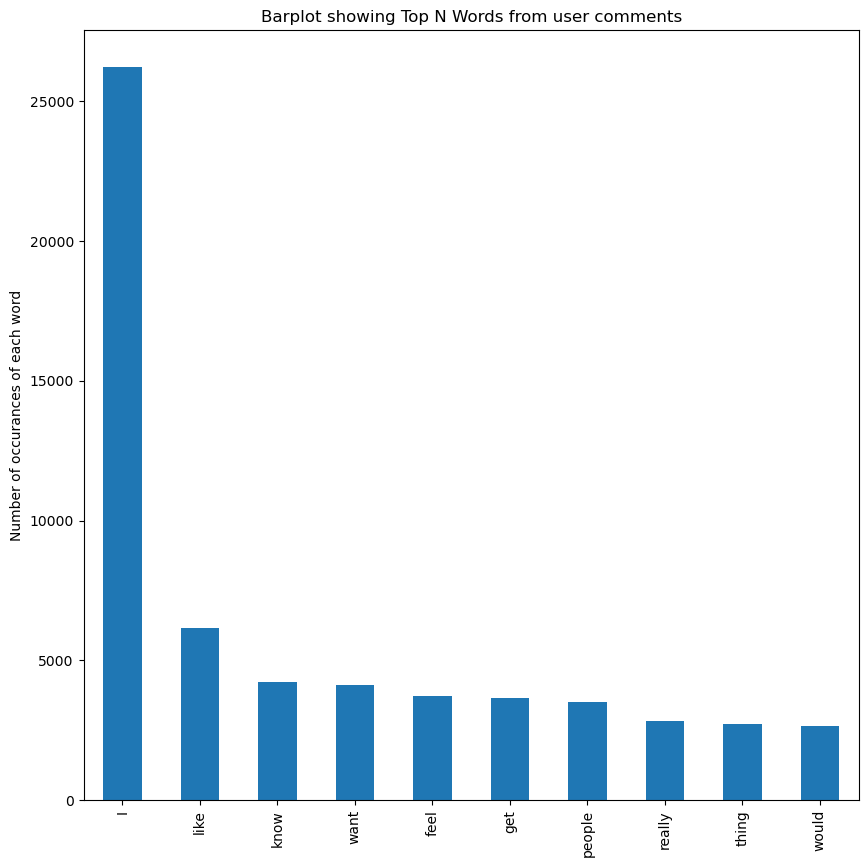

In [24]:
hero.top_words(data['Content']).head(10).plot.bar(figsize=(10,10))
plt.title('Barplot showing Top N Words from user comments')
plt.ylabel('Number of occurances of each word')
plt.show()

In [25]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(data['Content'])

In [26]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

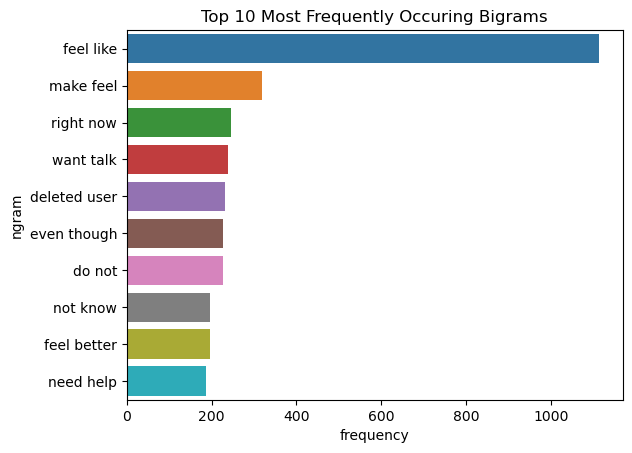

In [27]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

Text(0, 0.5, 'Frequency of Text Length')

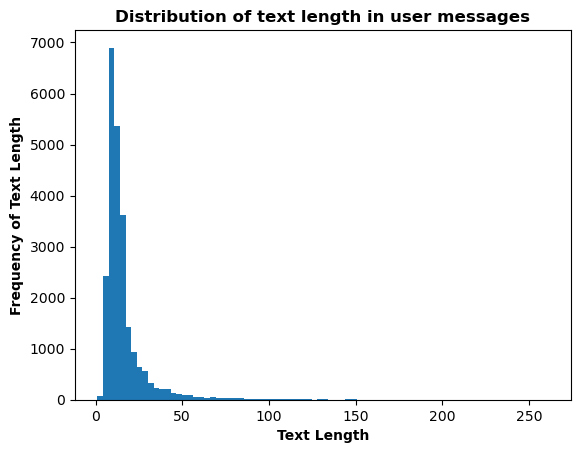

In [28]:
data["Words"] = data["Content"].apply(lambda n: len(n.split()))
data['Words'].plot.hist(bins=80)

plt.title('Distribution of text length in user messages', fontweight='bold')
plt.xlabel("Text Length", fontweight='bold')
plt.ylabel("Frequency of Text Length", fontweight='bold')

Text(0.5, 1.0, 'Wordcloud showing top N words')

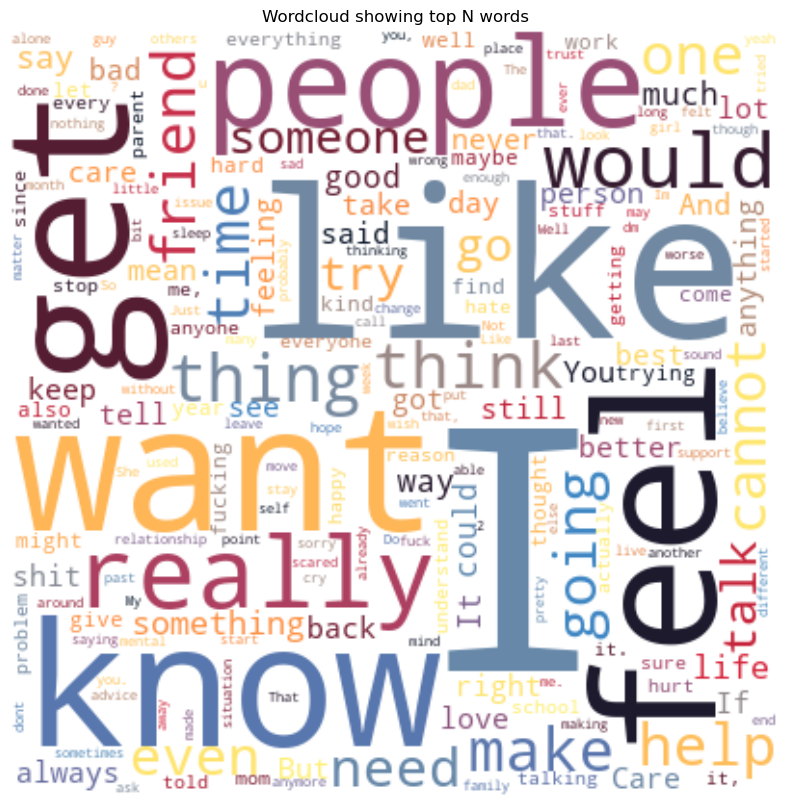

In [29]:
hero.visualization.wordcloud(data['Content'],width = 400, height= 400,background_color='White')
plt.title('Wordcloud showing top N words')

In [30]:
data = data.drop(columns='Words')

In [31]:
data.head()

,Content,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6,symptom_7,None
0,"Care The girl I crush on, fucked 2 guy time, f...",0,0,0,0,1,0,0,0
1,"I realized I could die literally moment, regre...",0,0,0,0,0,0,1,0
2,Care wild couple day And anyones would greatly...,0,0,0,0,0,0,0,1
3,"even making fun, like often present various la...",0,0,0,0,0,0,0,1
4,"x everyone need love life, fact. What understa...",0,0,0,0,0,0,0,1


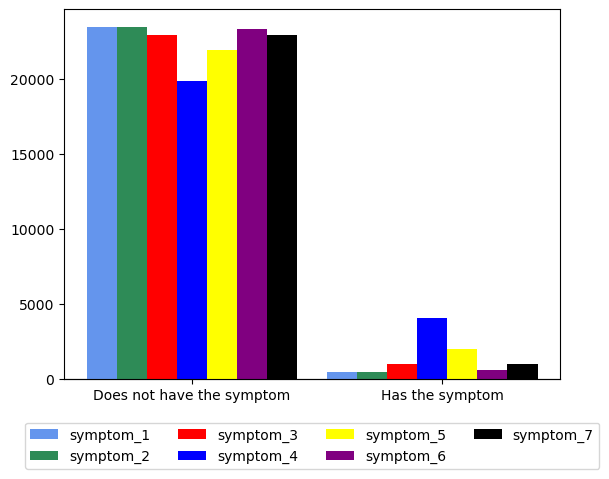

In [32]:
ig, ax = plt.subplots()

d_heights, d_bins = np.histogram(data['symptom_1'],bins=[-0.5, 1, 2])
m_heights, m_bins = np.histogram(data['symptom_2'], bins=d_bins)
s_heights, s_bins = np.histogram(data['symptom_3'], bins=m_bins)
ss_heights, ss_bins = np.histogram(data['symptom_4'], bins=s_bins)
t_heights, t_bins = np.histogram(data['symptom_5'], bins=ss_bins)
te_heights, te_bins = np.histogram(data['symptom_6'], bins=t_bins)
tr_heights, tr_bins = np.histogram(data['symptom_7'], bins=te_bins)


width = (d_bins[1] - d_bins[0]) / 8.0

ax.bar(d_bins[:-1] + width, d_heights, width=width, facecolor='cornflowerblue', label='symptom_1')
ax.bar(m_bins[:-1] + width * 2, m_heights, width=width, facecolor='seagreen', label='symptom_2')
ax.bar(s_bins[:-1] + width * 3, s_heights, width=width, facecolor='red', label='symptom_3')
ax.bar(ss_bins[:-1] + width * 4, ss_heights, width=width, facecolor='blue', label='symptom_4')
ax.bar(t_bins[:-1] + width * 5, t_heights, width=width, facecolor='yellow', label='symptom_5')
ax.bar(te_bins[:-1] + width * 6, te_heights, width=width, facecolor='purple', label='symptom_6')
ax.bar(tr_bins[:-1] + width * 7, tr_heights, width=width, facecolor='black', label='symptom_7')


secax = ax.secondary_xaxis('bottom')
secax.set_xticks([d_bins[0] + width * 4, ss_bins[-1] - width])
secax.set_xticklabels(['Does not have the symptom', 'Has the symptom'])
ax.get_xaxis().set_visible(False)
ax.legend()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

In [33]:
data['powerlabel'] = data.apply(lambda x : 6.4 * x['symptom_1'] + 3.2 * x['symptom_2'] + 1.6*x["symptom_3"] + 0.8 * x['symptom_4'] + 0.4 * x['symptom_5'] + 0.2 * x['symptom_6'] + 0.1 * x['symptom_7'],axis=1)

In [34]:
data.head()

,Content,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6,symptom_7,None,powerlabel
0,"Care The girl I crush on, fucked 2 guy time, f...",0,0,0,0,1,0,0,0,0.4
1,"I realized I could die literally moment, regre...",0,0,0,0,0,0,1,0,0.1
2,Care wild couple day And anyones would greatly...,0,0,0,0,0,0,0,1,0.0
3,"even making fun, like often present various la...",0,0,0,0,0,0,0,1,0.0
4,"x everyone need love life, fact. What understa...",0,0,0,0,0,0,0,1,0.0


In [35]:
powercount = {}
powerlabels = np.unique(data['powerlabel'])
for p in powerlabels:
    powercount[p] = np.count_nonzero(data['powerlabel'] == p)

maxcount = int(np.mean(list(powercount.values())))
new_data = pd.DataFrame()
desired_count = int(np.mean(list(powercount.values())))
for p in powerlabels:
    gapnum = maxcount - powercount[p]
    if gapnum <= 0:
        temp_df = data[data['powerlabel'] == p]
    else:
        temp_df = data.iloc[np.random.choice(np.where(data['powerlabel'] == p)[0], size=gapnum, replace=True)]
    
    undersample_num = powercount[p] - maxcount
    if undersample_num <= 0:
        new_data = pd.concat([new_data, temp_df])
    else:
        temp_df = temp_df.sample(n=maxcount, replace=False)
        new_data = pd.concat([new_data, temp_df])
    
data = new_data.sample(frac=1).reset_index(drop=True)

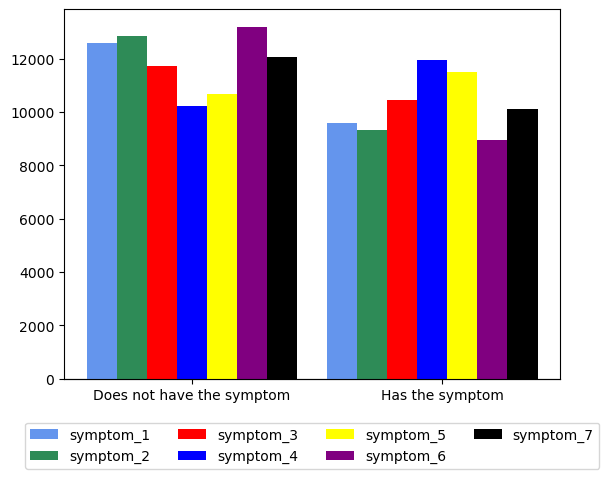

In [36]:
ig, ax = plt.subplots()

d_heights, d_bins = np.histogram(data['symptom_1'],bins=[-0.5, 1, 2])
m_heights, m_bins = np.histogram(data['symptom_2'], bins=d_bins)
s_heights, s_bins = np.histogram(data['symptom_3'], bins=m_bins)
ss_heights, ss_bins = np.histogram(data['symptom_4'], bins=s_bins)
t_heights, t_bins = np.histogram(data['symptom_5'], bins=ss_bins)
te_heights, te_bins = np.histogram(data['symptom_6'], bins=t_bins)
tr_heights, tr_bins = np.histogram(data['symptom_7'], bins=te_bins)


width = (d_bins[1] - d_bins[0])/8.0

ax.bar(d_bins[:-1]+width, d_heights, width=width, facecolor='cornflowerblue', label='symptom_1')
ax.bar(m_bins[:-1]+width*2, m_heights, width=width, facecolor='seagreen', label='symptom_2')
ax.bar(s_bins[:-1]+width*3, s_heights, width=width, facecolor='red', label='symptom_3')
ax.bar(ss_bins[:-1]+width*4, ss_heights, width=width, facecolor='blue', label='symptom_4')
ax.bar(t_bins[:-1]+width*5, t_heights, width=width, facecolor='yellow', label='symptom_5')
ax.bar(te_bins[:-1]+width*6, te_heights, width=width, facecolor='purple', label='symptom_6')
ax.bar(tr_bins[:-1]+width*7, tr_heights, width=width, facecolor='black', label='symptom_7')


secax = ax.secondary_xaxis('bottom')
secax.set_xticks([d_bins[0]+width*4, ss_bins[-1]-width])
secax.set_xticklabels(['Does not have the symptom', 'Has the symptom'])
ax.get_xaxis().set_visible(False)
ax.legend()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)
